# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
%pip install pandas nltk Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import pandas as pd
import datetime
import csv

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [7]:
df = pd.read_csv('hasil_scraper_review_app_duolingo.csv')
df.head(50000)


,reviewId,userName,content,score,at
0,a5df799b-7a2d-4cd5-96ac-6299f4e638e2,Pengguna Google,lumayan sih tapi agak bingung aja aku udah 44 ...,5,2025-10-26 12:24:24
1,18337687-fba3-4441-872a-9cc6722f2d54,Pengguna Google,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",3,2025-10-26 12:19:00
2,a860ae57-c14f-40f5-8498-44a7703be148,Pengguna Google,"freaking hell, abis update jadi kapitalis bgt ...",1,2025-10-26 12:17:06
3,dd2264de-aab7-4dee-a8e0-7a15a59506ef,Pengguna Google,The change from the heart system to the energy...,1,2025-10-26 12:15:53
4,9677b332-e3e5-4950-84d9-d156ff58bdb3,Pengguna Google,Duolingo itu applikasi yang bagus untuk belajar,5,2025-10-26 12:15:41
...,...,...,...,...,...
9995,6c866dba-bc3d-4d34-9260-19fe6be36197,Dimas bayu S,bagus and seru,5,2025-09-24 02:32:21
9996,677150bd-5606-4fe5-b180-3cb8a8065685,Aji Sundara,bagus this game not a glicht,5,2025-09-24 02:31:37
9997,6e83b8a8-606a-4dd5-bb78-7ba37fbea92a,RIZKI GANTENG Alfarizki,bikin pintar dan baik👍,4,2025-09-24 02:23:20
9998,a53d8793-f2f3-4f9e-9827-52a5fc3e9d68,hari susanto,GOOD coba tambah bahasa Thailand 🙆🏻‍♂️🙇🏻,4,2025-09-24 02:21:54


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df = pd.DataFrame(df[['at','userName','score','content']])
df.head(5)

,at,userName,score,content
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ..."
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ..."
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   at        10000 non-null  object
 1   userName  10000 non-null  object
 2   score     10000 non-null  int64 
 3   content   10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
#cek misiing values
df.isnull().sum()

at          0
userName    0
score       0
content     0
dtype: int64

In [ ]:
#cek panjang text atau content
df["content_length"] = df["content"].astype(str).apply(len)
df["content_length"].describe()


count    10000.00000
mean        63.65010
std         76.40438
min          1.00000
25%         17.00000
50%         40.00000
75%         76.00000
max        500.00000
Name: content_length, dtype: float64

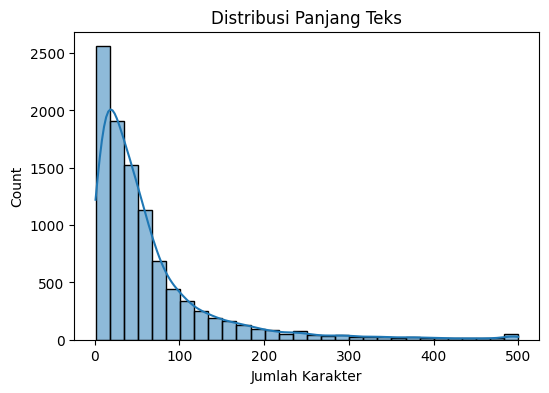

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["content_length"], bins=30, kde=True)
plt.title("Distribusi Panjang Teks")
plt.xlabel("Jumlah Karakter")
plt.show()


In [ ]:
#cek kata yang sering muncul

all_words = " ".join(df["content"].astype(str)).lower().split()
word_freq = Counter(all_words)

word_freq.most_common(10)


[('belajar', 3044),
 ('bahasa', 2717),
 ('bagus', 2686),
 ('sangat', 2521),
 ('dan', 1984),
 ('bisa', 1966),
 ('aku', 1717),
 ('saya', 1678),
 ('ini', 1641),
 ('untuk', 1503)]

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   at              10000 non-null  object
 1   userName        10000 non-null  object
 2   score           10000 non-null  int64 
 3   content         10000 non-null  object
 4   content_length  10000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


In [15]:
df.isnull().sum()

at                0
userName          0
score             0
content           0
content_length    0
dtype: int64

In [ ]:
#menghapus data yang duplikat
df.drop_duplicates(subset ="content", keep = 'first', inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8454 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   at              8454 non-null   object
 1   userName        8454 non-null   object
 2   score           8454 non-null   int64 
 3   content         8454 non-null   object
 4   content_length  8454 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 396.3+ KB


In [18]:
df.head()

,at,userName,score,content,content_length
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,59
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",90
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",161
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...,484
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,47


In [ ]:
#proses cleaning data
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # geometric shapes extended
            u"\U0001F800-\U0001F8FF"  # supplemental arrows-C
            u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
            u"\U0001FA00-\U0001FAFF"  # chess symbols + pictographs extended
            u"\U00002700-\U000027BF"  # dingbats
            u"\U000024C2-\U0001F251"  # enclosed characters
            u"\U0001F004-\U0001F0CF"  # additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                                "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet


df['cleaning'] = df['content'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))


df.head(10)

,at,userName,score,content,content_length,cleaning
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,59,lumayan sih tapi agak bingung aja aku udah ha...
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",90,bahasa Inggrisnya tidak bisa ke semua bahasa a...
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",161,freaking hell abis update jadi kapitalis bgt a...
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...,484,The change from the heart system to the energy...
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,47,Duolingo itu applikasi yang bagus untuk belajar
5,2025-10-26 12:14:09,Pengguna Google,5,sangat membantu,15,sangat membantu
6,2025-10-26 12:07:29,Pengguna Google,5,sagat bagus,11,sagat bagus
7,2025-10-26 12:04:01,Pengguna Google,5,thanks you duolingo karena duolingo aku gak pe...,104,thanks you duolingo karena duolingo aku gak pe...
8,2025-10-26 12:03:55,Pengguna Google,5,tolong tambahkan fitur chat di aplikasi mobile...,125,tolong tambahkan fitur chat di aplikasi mobile...
9,2025-10-26 12:00:44,Pengguna Google,1,jangan mulai kikir ya duolingo 🙂 udah bener pa...,390,jangan mulai kikir ya duolingo udah bener pak...


In [ ]:
#proses case folding
def case_folding(tweet):
    if isinstance(tweet, str):
        lowercase_text = tweet.lower()
        return lowercase_text
    else:
        return tweet

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,at,userName,score,content,content_length,cleaning,case_folding
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,59,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",90,bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",161,freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...,484,The change from the heart system to the energy...,the change from the heart system to the energy...
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,47,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar


In [ ]:
#proses normalisasi data
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [22]:
data = pd.DataFrame(df[['at','userName','score','content', 'cleaning', 'case_folding']])
data.head(5)

,at,userName,score,content,cleaning,case_folding
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...,The change from the heart system to the energy...,the change from the heart system to the energy...
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar


In [23]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [24]:
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(
    *data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku))
)

data.head(100)

,at,userName,score,content,cleaning,case_folding,normalisasi,Kata_Baku,Kata_Tidak_Baku,Kata_Tidak_Baku_Hash
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung saja aku sudah h...,"[saja, sudah]","[aja, udah]","[-7710513155847011248, -3630953501764728090]"
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,[],[],[]
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...,freaking hell habis update jadi kapitalis bang...,"[habis, banget, kalau, pakai]","[abis, bgt, kalo, pake]","[37773314973191561, 52744742045028436, -182638..."
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...,The change from the heart system to the energy...,the change from the heart system to the energy...,the change from the heart system tapi the ener...,"[tapi, tapi, sok, itu, tapi]","[to, to, so, it, to]","[5542330627967574348, 5542330627967574348, -85..."
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar,duolingo itu aplikasi yang bagus untuk belajar,[aplikasi],[applikasi],[-8840741982555917919]
...,...,...,...,...,...,...,...,...,...,...
102,2025-10-26 06:23:10,Pengguna Google,5,membantu belajar terutama belajar bahasa Inggris,membantu belajar terutama belajar bahasa Inggris,membantu belajar terutama belajar bahasa inggris,membantu belajar terutama belajar bahasa inggris,[],[],[]
103,2025-10-26 06:19:57,Pengguna Google,5,saya bisa mengetahui banyak bahasa... aplukasi...,saya bisa mengetahui banyak bahasa aplukasi in...,saya bisa mengetahui banyak bahasa aplukasi in...,saya bisa mengetahui banyak bahasa aplukasi in...,[],[],[]
104,2025-10-26 06:18:29,Pengguna Google,5,menurut aplikasi ini sangat rekomendasi sekali...,menurut aplikasi ini sangat rekomendasi sekali...,menurut aplikasi ini sangat rekomendasi sekali...,menurut aplikasi ini sangat rekomendasi sekali...,"[karena, habis]","[karna, abis]","[-5888913477554410474, 37773314973191561]"
105,2025-10-26 06:16:05,Pengguna Google,5,"apk nya sudah bagus tapi...., pas mau kebagian...",apk nya sudah bagus tapi pas mau kebagian tes ...,apk nya sudah bagus tapi pas mau kebagian tes ...,apk ya sudah bagus tapi pas mau kebagian tes b...,"[ya, tidak, begitu, ya]","[nya, gak, gitu, nya]","[-4922329651213012686, -7134240140607771193, 5..."


In [25]:
df = pd.DataFrame(
    data[['at', 'userName', 'score', 'content', 'cleaning', 'case_folding', 'normalisasi']]
)

df.head(20)

,at,userName,score,content,cleaning,case_folding,normalisasi
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung saja aku sudah h...
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...,freaking hell habis update jadi kapitalis bang...
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...,The change from the heart system to the energy...,the change from the heart system to the energy...,the change from the heart system tapi the ener...
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar,duolingo itu aplikasi yang bagus untuk belajar
5,2025-10-26 12:14:09,Pengguna Google,5,sangat membantu,sangat membantu,sangat membantu,sangat membantu
6,2025-10-26 12:07:29,Pengguna Google,5,sagat bagus,sagat bagus,sagat bagus,sagat bagus
7,2025-10-26 12:04:01,Pengguna Google,5,thanks you duolingo karena duolingo aku gak pe...,thanks you duolingo karena duolingo aku gak pe...,thanks you duolingo karena duolingo aku gak pe...,thanks you duolingo karena duolingo aku tidak ...
8,2025-10-26 12:03:55,Pengguna Google,5,tolong tambahkan fitur chat di aplikasi mobile...,tolong tambahkan fitur chat di aplikasi mobile...,tolong tambahkan fitur chat di aplikasi mobile...,tolong tambahkan fitur chat di aplikasi mobile...
9,2025-10-26 12:00:44,Pengguna Google,1,jangan mulai kikir ya duolingo 🙂 udah bener pa...,jangan mulai kikir ya duolingo udah bener pak...,jangan mulai kikir ya duolingo udah bener pak...,jangan mulai kikir ya duolingo sudah benar pak...


In [ ]:
#proses tokenization
def tokenization(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenization)
df.head(5)

,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung saja aku sudah h...,"[lumayan, sih, tapi, agak, bingung, saja, aku,..."
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,"[bahasa, inggrisnya, tidak, bisa, ke, semua, b..."
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...,freaking hell habis update jadi kapitalis bang...,"[freaking, hell, habis, update, jadi, kapitali..."
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...,The change from the heart system to the energy...,the change from the heart system to the energy...,the change from the heart system tapi the ener...,"[the, change, from, the, heart, system, tapi, ..."
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar,duolingo itu aplikasi yang bagus untuk belajar,"[duolingo, itu, aplikasi, yang, bagus, untuk, ..."


In [ ]:
#proses stopword removal
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHIVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]
df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize,stopword_removal
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung saja aku sudah h...,"[lumayan, sih, tapi, agak, bingung, saja, aku,...","[lumayan, sih, bingung, beruntun]"
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,"[bahasa, inggrisnya, tidak, bisa, ke, semua, b...","[bahasa, inggrisnya, bahasa, belajar, bahasa, ..."
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...,freaking hell habis update jadi kapitalis bang...,"[freaking, hell, habis, update, jadi, kapitali...","[freaking, hell, habis, update, kapitalis, ban..."
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...,The change from the heart system to the energy...,the change from the heart system to the energy...,the change from the heart system tapi the ener...,"[the, change, from, the, heart, system, tapi, ...","[the, change, from, the, heart, system, the, e..."
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar,duolingo itu aplikasi yang bagus untuk belajar,"[duolingo, itu, aplikasi, yang, bagus, untuk, ...","[duolingo, aplikasi, bagus, belajar]"


In [ ]:
#proses steming data
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword_removal'].apply(lambda x: ' ' .join(stem_text(x)))
df.head(5)

,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize,stopword_removal,steming_data
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung saja aku sudah h...,"[lumayan, sih, tapi, agak, bingung, saja, aku,...","[lumayan, sih, bingung, beruntun]",lumayan sih bingung untun
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,"[bahasa, inggrisnya, tidak, bisa, ke, semua, b...","[bahasa, inggrisnya, bahasa, belajar, bahasa, ...",bahasa inggris bahasa ajar bahasa thailand india
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...,freaking hell habis update jadi kapitalis bang...,"[freaking, hell, habis, update, jadi, kapitali...","[freaking, hell, habis, update, kapitalis, ban...",freaking hell habis update kapitalis banget an...
3,2025-10-26 12:15:53,Pengguna Google,1,The change from the heart system to the energy...,The change from the heart system to the energy...,the change from the heart system to the energy...,the change from the heart system tapi the ener...,"[the, change, from, the, heart, system, tapi, ...","[the, change, from, the, heart, system, the, e...",the change from the heart system the energy sy...
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar,duolingo itu aplikasi yang bagus untuk belajar,"[duolingo, itu, aplikasi, yang, bagus, untuk, ...","[duolingo, aplikasi, bagus, belajar]",duolingo aplikasi bagus ajar


In [ ]:
#proses deteksi dan penanganan outlier
df["content_length"] = df["cleaning"].apply(len)

Q1 = df["content_length"].quantile(0.25)
Q3 = df["content_length"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["content_length"] >= lower) & (df["content_length"] <= upper)]


In [31]:
df.head()

,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize,stopword_removal,steming_data,content_length
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung saja aku sudah h...,"[lumayan, sih, tapi, agak, bingung, saja, aku,...","[lumayan, sih, bingung, beruntun]",lumayan sih bingung untun,57
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,"[bahasa, inggrisnya, tidak, bisa, ke, semua, b...","[bahasa, inggrisnya, bahasa, belajar, bahasa, ...",bahasa inggris bahasa ajar bahasa thailand india,88
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...,freaking hell habis update jadi kapitalis bang...,"[freaking, hell, habis, update, jadi, kapitali...","[freaking, hell, habis, update, kapitalis, ban...",freaking hell habis update kapitalis banget an...,157
4,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar,duolingo itu aplikasi yang bagus untuk belajar,"[duolingo, itu, aplikasi, yang, bagus, untuk, ...","[duolingo, aplikasi, bagus, belajar]",duolingo aplikasi bagus ajar,47
5,2025-10-26 12:14:09,Pengguna Google,5,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]",[membantu],bantu,15


In [32]:
df.to_csv('Hasil_Preprocessing_Data_Aplikasi Duolingo.csv', encoding='utf-8', index=False)

In [ ]:
#proses labelling
data = pd.read_csv('Hasil_Preprocessing_Data_Aplikasi Duolingo.csv')
data.head(5)

,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize,stopword_removal,steming_data,content_length
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung saja aku sudah h...,"['lumayan', 'sih', 'tapi', 'agak', 'bingung', ...","['lumayan', 'sih', 'bingung', 'beruntun']",lumayan sih bingung untun,57
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,"['bahasa', 'inggrisnya', 'tidak', 'bisa', 'ke'...","['bahasa', 'inggrisnya', 'bahasa', 'belajar', ...",bahasa inggris bahasa ajar bahasa thailand india,88
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...,freaking hell habis update jadi kapitalis bang...,"['freaking', 'hell', 'habis', 'update', 'jadi'...","['freaking', 'hell', 'habis', 'update', 'kapit...",freaking hell habis update kapitalis banget an...,157
3,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar,duolingo itu aplikasi yang bagus untuk belajar,"['duolingo', 'itu', 'aplikasi', 'yang', 'bagus...","['duolingo', 'aplikasi', 'bagus', 'belajar']",duolingo aplikasi bagus ajar,47
4,2025-10-26 12:14:09,Pengguna Google,5,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"['sangat', 'membantu']",['membantu'],bantu,15


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7743 entries, 0 to 7742
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   at                7743 non-null   object
 1   userName          7743 non-null   object
 2   score             7743 non-null   int64 
 3   content           7743 non-null   object
 4   cleaning          7697 non-null   object
 5   case_folding      7697 non-null   object
 6   normalisasi       7662 non-null   object
 7   tokenize          7743 non-null   object
 8   stopword_removal  7743 non-null   object
 9   steming_data      7620 non-null   object
 10  content_length    7743 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 665.5+ KB


In [35]:
df = data.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7620 entries, 0 to 7742
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   at                7620 non-null   object
 1   userName          7620 non-null   object
 2   score             7620 non-null   int64 
 3   content           7620 non-null   object
 4   cleaning          7620 non-null   object
 5   case_folding      7620 non-null   object
 6   normalisasi       7620 non-null   object
 7   tokenize          7620 non-null   object
 8   stopword_removal  7620 non-null   object
 9   steming_data      7620 non-null   object
 10  content_length    7620 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 714.4+ KB


In [37]:
def determine_sentiment(text):
    if not isinstance(text, str):
        return "Netral"

    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)

    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"
    else:
        return "Netral"


positive_lexicon = set(pd.read_csv("lexicon_positif.csv", sep=",", header=None)[0])
negative_lexicon = set(pd.read_csv("lexicon_negatif.csv", sep=",", header=None)[0])

df["Sentiment"] = df["steming_data"].apply(determine_sentiment)

df.head(5)

C:\Users\SHIVA\AppData\Local\Temp\ipykernel_3228\1540184157.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"] = df["steming_data"].apply(determine_sentiment)


,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize,stopword_removal,steming_data,content_length,Sentiment
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung saja aku sudah h...,"['lumayan', 'sih', 'tapi', 'agak', 'bingung', ...","['lumayan', 'sih', 'bingung', 'beruntun']",lumayan sih bingung untun,57,Netral
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,"['bahasa', 'inggrisnya', 'tidak', 'bisa', 'ke'...","['bahasa', 'inggrisnya', 'bahasa', 'belajar', ...",bahasa inggris bahasa ajar bahasa thailand india,88,Positif
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...,freaking hell habis update jadi kapitalis bang...,"['freaking', 'hell', 'habis', 'update', 'jadi'...","['freaking', 'hell', 'habis', 'update', 'kapit...",freaking hell habis update kapitalis banget an...,157,Negatif
3,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar,duolingo itu aplikasi yang bagus untuk belajar,"['duolingo', 'itu', 'aplikasi', 'yang', 'bagus...","['duolingo', 'aplikasi', 'bagus', 'belajar']",duolingo aplikasi bagus ajar,47,Positif
4,2025-10-26 12:14:09,Pengguna Google,5,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"['sangat', 'membantu']",['membantu'],bantu,15,Positif


In [38]:
df.to_csv('Hasil_Preprocssing dan Labelling_Data_Aplikasi Duolingo.csv', encoding='utf8', index=False)

In [ ]:
#proses pembagian data train dan test
data = pd.read_csv('Hasil_Preprocssing dan Labelling_Data_Aplikasi Duolingo.csv')
data.head()

,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize,stopword_removal,steming_data,content_length,Sentiment
0,2025-10-26 12:24:24,Pengguna Google,5,lumayan sih tapi agak bingung aja aku udah 44 ...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung aja aku udah ha...,lumayan sih tapi agak bingung saja aku sudah h...,"['lumayan', 'sih', 'tapi', 'agak', 'bingung', ...","['lumayan', 'sih', 'bingung', 'beruntun']",lumayan sih bingung untun,57,Netral
1,2025-10-26 12:19:00,Pengguna Google,3,"bahasa Inggrisnya tidak bisa ke semua bahasa, ...",bahasa Inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,bahasa inggrisnya tidak bisa ke semua bahasa a...,"['bahasa', 'inggrisnya', 'tidak', 'bisa', 'ke'...","['bahasa', 'inggrisnya', 'bahasa', 'belajar', ...",bahasa inggris bahasa ajar bahasa thailand india,88,Positif
2,2025-10-26 12:17:06,Pengguna Google,1,"freaking hell, abis update jadi kapitalis bgt ...",freaking hell abis update jadi kapitalis bgt a...,freaking hell abis update jadi kapitalis bgt a...,freaking hell habis update jadi kapitalis bang...,"['freaking', 'hell', 'habis', 'update', 'jadi'...","['freaking', 'hell', 'habis', 'update', 'kapit...",freaking hell habis update kapitalis banget an...,157,Negatif
3,2025-10-26 12:15:41,Pengguna Google,5,Duolingo itu applikasi yang bagus untuk belajar,Duolingo itu applikasi yang bagus untuk belajar,duolingo itu applikasi yang bagus untuk belajar,duolingo itu aplikasi yang bagus untuk belajar,"['duolingo', 'itu', 'aplikasi', 'yang', 'bagus...","['duolingo', 'aplikasi', 'bagus', 'belajar']",duolingo aplikasi bagus ajar,47,Positif
4,2025-10-26 12:14:09,Pengguna Google,5,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"['sangat', 'membantu']",['membantu'],bantu,15,Positif


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   at                7620 non-null   object
 1   userName          7620 non-null   object
 2   score             7620 non-null   int64 
 3   content           7620 non-null   object
 4   cleaning          7620 non-null   object
 5   case_folding      7620 non-null   object
 6   normalisasi       7620 non-null   object
 7   tokenize          7620 non-null   object
 8   stopword_removal  7620 non-null   object
 9   steming_data      7620 non-null   object
 10  content_length    7620 non-null   int64 
 11  Sentiment         7620 non-null   object
dtypes: int64(2), object(10)
memory usage: 714.5+ KB


In [41]:
df = data.dropna()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   at                7620 non-null   object
 1   userName          7620 non-null   object
 2   score             7620 non-null   int64 
 3   content           7620 non-null   object
 4   cleaning          7620 non-null   object
 5   case_folding      7620 non-null   object
 6   normalisasi       7620 non-null   object
 7   tokenize          7620 non-null   object
 8   stopword_removal  7620 non-null   object
 9   steming_data      7620 non-null   object
 10  content_length    7620 non-null   int64 
 11  Sentiment         7620 non-null   object
dtypes: int64(2), object(10)
memory usage: 714.5+ KB


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['steming_data'],
    df['Sentiment'],
    test_size=0.2,
    random_state=42
)

In [44]:
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [45]:
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

In [46]:
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 6096
Jumlah Data Uji: 1524
